<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/BERT_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BERT Word Embeddings

BERT (Bidirectional Encoder Representations from Transformers)

BERT is a method of pretraining language representations that is used to create models that NLP practicioners

We can use tasks such as classification, entity recognition, question answering



## Why use BERT Embedding? 

We use BERT to extract features, namely word and sentence embedding vectors, from text data.

First, these embeddings are useful for keyword/search expansion, semantic search and information retrieval.

If we want to match customer questions or searches against already answered questions or well documented searches, these representations will help us accuratley retrieve results matching the customer’s intent and contextual meaning, even if there’s no keyword or phrase overlap.

BERT offers an advantage over models like Word2Vec, because while each word has a fixed representation under Word2Vec regardless of the context within which the word appears, BERT produces word representations that are dynamically informed by the words around them.

“The man was accused of robbing a bank.” “The man went fishing by the bank of the river.”

Word2Vec would produce the same word embedding for the word “bank” in both sentences, while under BERT the word embedding for “bank” would be different for each sentence





## Loading Pre-Trained BERT

In [1]:
!pip install transformers

     |████████████████████████████████| 1.9MB 4.5MB/s 
     |████████████████████████████████| 890kB 23.7MB/s 
     |████████████████████████████████| 3.2MB 36.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=fde7c58f50528a97b3edfc9c9dc97e4bc74466810416a4d9c906baf4c1f6eedc
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


## transformers

provides a number of classes for applying BERT to different tasks (token classification, text classification, …). Here, we’re using the basic BertModel which has no specific output task–it’s a good choice for using BERT just to extract embeddings.

## Input Formatting

A special token, [SEP], to mark the end of a sentence, or the separation between two sentences

A special token, [CLS], at the beginning of our text. 

This token is used for classification tasks, but BERT expects it no matter what your application is. Tokens that conform with the fixed vocabulary used in BERT

The Token IDs for the tokens, from BERT’s tokenizer

Mask IDs to indicate which elements in the sequence are tokens and which are padding elements

Segment IDs used to distinguish different sentences

Positional Embeddings used to show token position within the sequence

#Special Tokens

BERT can take as input either one or two sentences, and uses the special token [SEP] to differentiate them. The [CLS] token always appears at the start of the text, and is specific to classification tasks.


##2 Sentence Input:

[CLS] The man went to the store. [SEP] He bought a gallon of milk.

## 1 Sentence Input:

[CLS] The man went to the store. [SEP]


In [2]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


## Tokenization

BERT provides its own tokenizer, which we imported above. We can see how it handles the sentence below


In [3]:
text = "Here is the sentence I want embeddings for."
marked_text = "[CLS] " + text + " [SEP]"

# Tokenize our sentence with the BERT tokenizer.
tokenized_text = tokenizer.tokenize(marked_text)

# Print out the tokens.
print (tokenized_text)

# We can see how the word “embeddings” is represented: 
# The original word has been split into smaller subwords and characters.


['[CLS]', 'here', 'is', 'the', 'sentence', 'i', 'want', 'em', '##bed', '##ding', '##s', 'for', '.', '[SEP]']


##Why does it look this way? 

This is because the BERT tokenizer was created with a WordPiece model. This model greedily creates a fixed-size vocabulary of individual characters, subwords, and words that best fits our language data. 

Since the vocabulary limit size of our BERT tokenizer model is 30,000, the WordPiece model generated a vocabulary that contains all English characters plus the ~30,000 most common words and subwords found in the English language corpus the model is trained on.

1)Whole words

2)Subwords occuring at the front of a word or in isolation (“em” as in “embeddings” is assigned the same vector as the standalone sequence of characters “em” as in “go get em” )

3)Subwords not at the front of a word, which are preceded by ‘##’ to denote this case

4)Individual characters



In [4]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen " \
       "fishing on the Mississippi river bank."

# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
after         2,044
stealing     11,065
money         2,769
from          2,013
the           1,996
bank          2,924
vault        11,632
,             1,010
the           1,996
bank          2,924
robber       27,307
was           2,001
seen          2,464
fishing       5,645
on            2,006
the           1,996
mississippi   5,900
river         2,314
bank          2,924
.             1,012
[SEP]           102


#Segment ID

BERT is trained on and expects sentence pairs, using 1s and 0s to distinguish between the two sentences. 

To process two sentences, assign each word in the first sentence plus the ‘[SEP]’ token a 0, and all tokens of the second sentence a 1.

In [5]:
# Mark each of the 22 tokens as belonging to sentence "1".
segments_ids = [1] * len(tokenized_text)

print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#Extracting Embeddings

##Running BERT on our text

We need to convert our data to torch tensors and call the BERT model

Next, let’s evaluate BERT on our example text

In [9]:
# Convert inputs to PyTorch tensors
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

#the Output

1.The layer number (13 layers)

2.The batch number (1 sentence)

3.The word / token number (22 tokens in our sentence)

4.The hidden unit / feature number (768 features)

Wait, 13 layers? Doesn’t BERT only have 12? It’s 13 because the first element is the input embeddings, the rest is the outputs of each of BERT’s 12 layers.

That’s 219,648 unique values just to represent our one sentence!


In [10]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

Grouping the values by layer makes sense for the model, but for our purposes we want it grouped by token.

Current dimensions:

[# layers, # batches, # tokens, # features]

Desired dimensions:

[# tokens, # layers, # features]



In [11]:
# Run the text through BERT, and collect all of the hidden states produced
# from all 12 layers. 
with torch.no_grad():

    outputs = model(tokens_tensor, segments_tensors)

    # Evaluating the model will return a different number of objects based on 
    # how it's  configured in the `from_pretrained` call earlier. In this case, 
    # becase we set `output_hidden_states = True`, the third item will be the 
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

In [12]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 22
Number of hidden units: 768


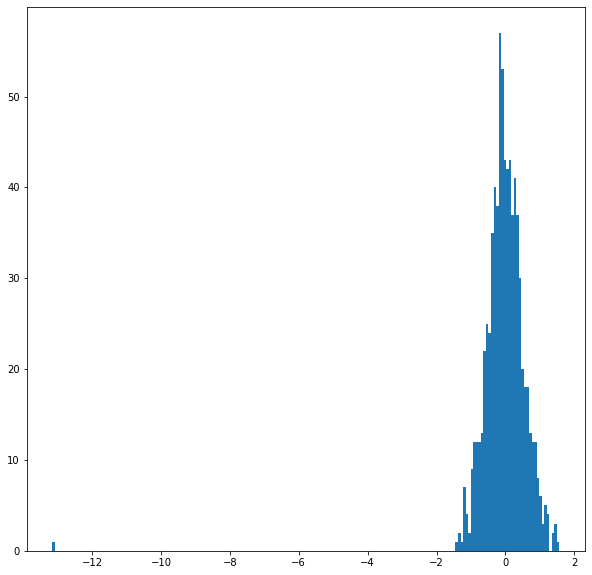

In [13]:
# For the 5th token in our sentence, select its feature values from layer 5.
token_i = 5
layer_i = 5
vec = hidden_states[layer_i][batch_i][token_i]

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [14]:
# `hidden_states` is a Python list.
print('      Type of hidden_states: ', type(hidden_states))

# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', hidden_states[0].size())

      Type of hidden_states:  <class 'tuple'>
Tensor shape for each layer:  torch.Size([1, 22, 768])


## We combine the layers to make this one whole big tensor.

In [15]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

torch.Size([13, 1, 22, 768])

In [16]:
torch.Size([13, 1, 22, 768])

torch.Size([13, 1, 22, 768])

In [17]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()

torch.Size([13, 22, 768])

In [18]:
torch.Size([13, 22, 768])

torch.Size([13, 22, 768])

In [19]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()

torch.Size([22, 13, 768])

### Creating word and sentence vectors from hidden states

what do we do with these hidden states? 

We would like to get individual vectors for each of our tokens, or perhaps a single vector representation of the whole sentence, but for each token of our input we have 13 separate vectors each of length 768.

## Word Vectors

Concatenate the last four layers, giving us a single word vector per token. Each vector will have length 4 x 768 = 3,072.

Alternatively, we can create the word vectors by summing together the last four layers.

## Sentence Vectors
To get a single vector for our entire sentence we have multiple application-dependent strategies, but a simple approach is to average the second to last hiden layer of each token producing a single 768 length vector.


In [20]:
# Stores the token vectors, with shape [22 x 3,072]
token_vecs_cat = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    
    # `token` is a [12 x 768] tensor

    # Concatenate the vectors (that is, append them together) from the last 
    # four layers.
    # Each layer vector is 768 values, so `cat_vec` is length 3,072.
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    
    # Use `cat_vec` to represent `token`.
    token_vecs_cat.append(cat_vec)

print ('Shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

Shape is: 22 x 3072


In [21]:
# Stores the token vectors, with shape [22 x 768]
token_vecs_sum = []

# `token_embeddings` is a [22 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:

    # `token` is a [12 x 768] tensor

    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))


Shape is: 22 x 768


In [22]:
# `hidden_states` has shape [13 x 1 x 22 x 768]

# `token_vecs` is a tensor with shape [22 x 768]
token_vecs = hidden_states[-2][0]

# Calculate the average of all 22 token vectors.
sentence_embedding = torch.mean(token_vecs, dim=0)
print ("Our final sentence embedding vector of shape:", sentence_embedding.size())

Our final sentence embedding vector of shape: torch.Size([768])


#Confirming contextually dependent vectors

To confirm that the value of these vectors are in fact contextually dependent, let’s look at the different instances of the word “bank” in our example sentence:

"“After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank.”"

Bank is located.

They are at 6, 10, and 19.




In [23]:
for i, token_str in enumerate(tokenized_text):
  print (i, token_str)

0 [CLS]
1 after
2 stealing
3 money
4 from
5 the
6 bank
7 vault
8 ,
9 the
10 bank
11 robber
12 was
13 seen
14 fishing
15 on
16 the
17 mississippi
18 river
19 bank
20 .
21 [SEP]


In [24]:
print('First 5 vector values for each instance of "bank".')
print('')
print("bank vault   ", str(token_vecs_sum[6][:5]))
print("bank robber  ", str(token_vecs_sum[10][:5]))
print("river bank   ", str(token_vecs_sum[19][:5]))

First 5 vector values for each instance of "bank".

bank vault    tensor([ 3.3596, -2.9805, -1.5421,  0.7065,  2.0031])
bank robber   tensor([ 2.7359, -2.5577, -1.3094,  0.6797,  1.6633])
river bank    tensor([ 1.5266, -0.8895, -0.5152, -0.9298,  2.8334])
